In [18]:
!pip install shap

In [19]:
import shap
import joblib
import pandas as pd

rf = joblib.load("../models/random_forest_ids.pkl")
scaler = joblib.load("../models/scaler.pkl")

df = pd.read_csv("../data/processed/cicids_binary_clean.csv")

X = df.drop("BinaryLabel", axis=1)
y = df["BinaryLabel"]

X_scaled = scaler.transform(X)


In [20]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_scaled[:1000])

In [21]:
print(type(shap_values))
print(len(shap_values))
print(shap_values[1].shape)
print(X_scaled[:1000].shape)

<class 'numpy.ndarray'>
1000
(78, 2)
(1000, 78)


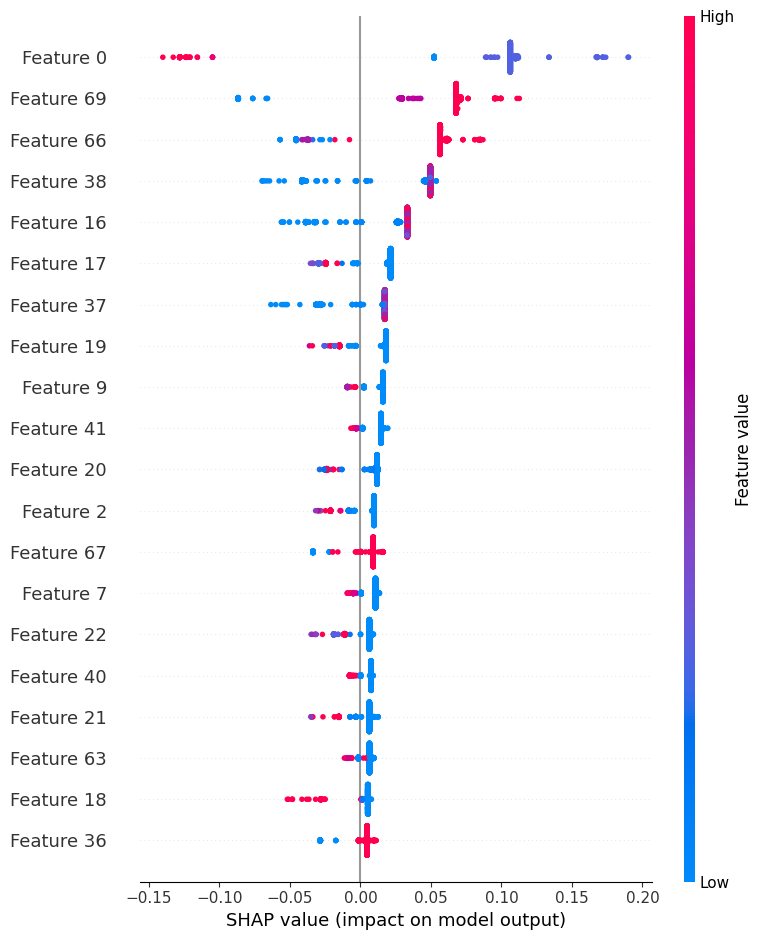

In [22]:
# Use only first 1000 samples
sample_data = X_scaled[:1000]

# Get SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(sample_data)

# For new SHAP: select class 1
shap_class1 = shap_values[:, :, 1]

# Plot
shap.summary_plot(shap_class1, sample_data)


In [23]:
import pandas as pd

# Convert scaled data back to DataFrame
X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=X.columns
)
sample_df = X_scaled_df.sample(500, random_state=42)


 97%|=================== | 1942/2000 [00:13<00:00]       

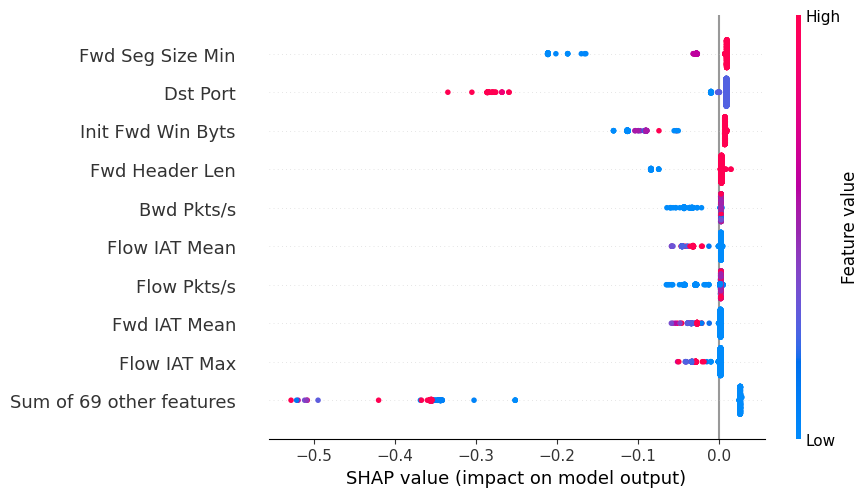

In [24]:
sample_df = X_scaled_df.iloc[:1000]

explainer = shap.Explainer(rf, sample_df)
shap_values = explainer(sample_df)

shap.plots.beeswarm(shap_values[:, :, 1])


In [27]:
print(type(shap_values))
print(len(shap_values))
print(shap_values[0].shape)

<class 'shap._explanation.Explanation'>
1000
(78, 2)


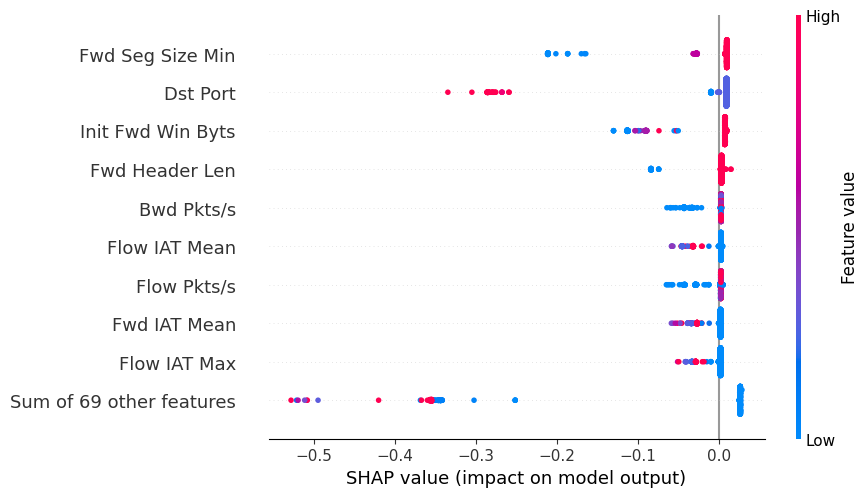

In [29]:
shap.plots.beeswarm(shap_values[:, :, 1])

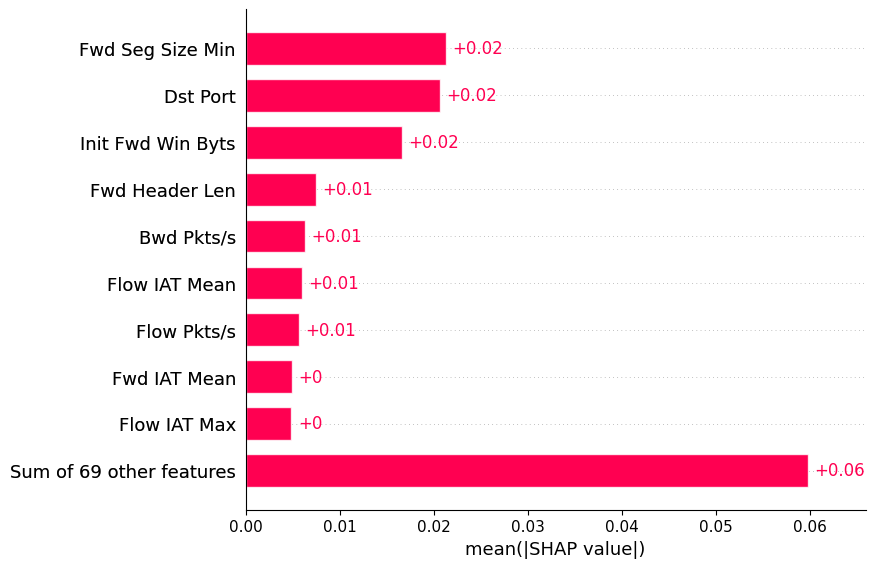

In [30]:
shap.plots.bar(shap_values[:, :, 1])